# Project Objective

Utilize data visualization techniques to discern trends, patterns, and potential improvement areas by analyzing defect rates, opportunities, and control limits within the dataset. The primary aim is to gain comprehensive insights and a nuanced understanding of the data, empowering informed decision-making through visual representations.

## Data Dictionary

|Features|Description|
|--------|------------|
|`Product`|Laptop|
|`Month ID(YYYYMM)`|The time period during which the data was collected.|
|`Defects`|Number of defects found during the time period.|
|`Opportunities`|Number of chances where a defect could potentially occur within a single unit.|
|`Mean Rate`|The average number of defects per opportunity.|
|`2 Sigma Limit`|The control limit that is two standard deviations away from the mean.|
|`3 Sigma Limit`|The control limit that is three standard deviations away from the mean.|

# Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Acquisition

In [2]:
path = r"C:\Users\nene0\Documents\Datasets\Laptop_DataVisProject.xlsx"

df = pd.read_excel(path, sheet_name='Data') #pass parameter sheet_name
df.head(5)

,Product,Month ID(YYYYMM),Defects,Opportunities,Mean Rate,2 Sigma limit,3 Sigma limit
0,Laptop,201607,37,222,81319,188681,242363
1,Laptop,201608,26,36,81319,188681,242363
2,Laptop,201609,66,375,81319,188681,242363
3,Laptop,201610,61,494,81319,188681,242363
4,Laptop,201611,64,980,81319,188681,242363


# Data Analysis

In [3]:
df.info() # There is no missing values!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product           24 non-null     object
 1   Month ID(YYYYMM)  24 non-null     int64 
 2   Defects           24 non-null     int64 
 3   Opportunities     24 non-null     int64 
 4   Mean Rate         24 non-null     int64 
 5   2 Sigma limit     24 non-null     int64 
 6   3 Sigma limit     24 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.4+ KB


In [4]:
df.describe()

,Month ID(YYYYMM),Defects,Opportunities,Mean Rate,2 Sigma limit,3 Sigma limit
count,24.000000,24.000000,24.000000,24.0,24.0,24.0
mean,201706.500000,122.166667,1954.041667,81319.0,188681.0,242363.0
std,70.119773,52.201671,924.026796,0.0,0.0,0.0
min,201607.000000,26.000000,36.000000,81319.0,188681.0,242363.0
25%,201678.750000,94.750000,1741.250000,81319.0,188681.0,242363.0
50%,201706.500000,125.000000,2180.500000,81319.0,188681.0,242363.0
75%,201734.250000,147.500000,2448.750000,81319.0,188681.0,242363.0
max,201806.000000,243.000000,3516.000000,81319.0,188681.0,242363.0


In [5]:
def create_date_features(dataframe, month_id):
    """This function allows to generate a new date features in the dataframe."""
    dataframe[month_id] = dataframe[month_id].astype(str)
    change_to_datetime = pd.to_datetime(dataframe[month_id], format='%Y%m')
    dataframe['Month_Yr'] = change_to_datetime
    dataframe['Month_Yr'] = dataframe['Month_Yr'].dt.strftime('%y %b')

    dataframe['Year'] = change_to_datetime
    dataframe['Year'] = dataframe['Year'].dt.year

    dataframe['Month'] = change_to_datetime
    dataframe['Month'] = dataframe['Month'].dt.month

In [6]:
create_date_features(df, "Month ID(YYYYMM)")

In [7]:
df.head(5)

,Product,Month ID(YYYYMM),Defects,Opportunities,Mean Rate,2 Sigma limit,3 Sigma limit,Month_Yr,Year,Month
0,Laptop,201607,37,222,81319,188681,242363,16 Jul,2016,7
1,Laptop,201608,26,36,81319,188681,242363,16 Aug,2016,8
2,Laptop,201609,66,375,81319,188681,242363,16 Sep,2016,9
3,Laptop,201610,61,494,81319,188681,242363,16 Oct,2016,10
4,Laptop,201611,64,980,81319,188681,242363,16 Nov,2016,11


In [8]:
# Create a defect rate and PPM conversion features.
df['Defect_Rate'] = round(df['Defects']/df['Opportunities'], 4)
df['PPM_conv'] = round((df['Defect_Rate']*1000000), 4)

In [9]:
df.head(5)

,Product,Month ID(YYYYMM),Defects,Opportunities,Mean Rate,2 Sigma limit,3 Sigma limit,Month_Yr,Year,Month,Defect_Rate,PPM_conv
0,Laptop,201607,37,222,81319,188681,242363,16 Jul,2016,7,0.1667,166700.0
1,Laptop,201608,26,36,81319,188681,242363,16 Aug,2016,8,0.7222,722200.0
2,Laptop,201609,66,375,81319,188681,242363,16 Sep,2016,9,0.1760,176000.0
3,Laptop,201610,61,494,81319,188681,242363,16 Oct,2016,10,0.1235,123500.0
4,Laptop,201611,64,980,81319,188681,242363,16 Nov,2016,11,0.0653,65300.0


In [10]:
df_defects_pivot = df.pivot(index='Year', columns='Month', values='Defects')
df_defects_pivot

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,NaN,37.0,26.0,66.0,61.0,64.0,104.0
2017,85.0,98.0,130.0,107.0,135.0,158.0,116.0,226.0,171.0,124.0,119.0,146.0
2018,134.0,152.0,170.0,126.0,134.0,243.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_defects_pivot.fillna(0, inplace=True)

In [12]:
df_defects_pivot # The production may have begin from July 2016

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2016,0.0,0.0,0.0,0.0,0.0,0.0,37.0,26.0,66.0,61.0,64.0,104.0
2017,85.0,98.0,130.0,107.0,135.0,158.0,116.0,226.0,171.0,124.0,119.0,146.0
2018,134.0,152.0,170.0,126.0,134.0,243.0,0.0,0.0,0.0,0.0,0.0,0.0


## Number of Defects Overtime

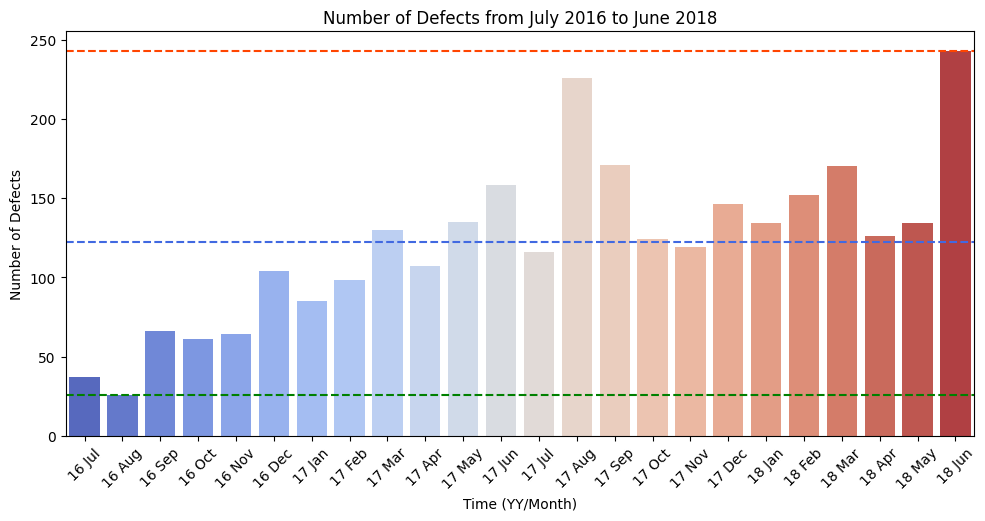

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Month_Yr", y="Defects", palette="coolwarm")
plt.axhline(y=df['Defects'].mean(), c="royalblue", linestyle="--")
plt.axhline(y=df['Defects'].max(), c="orangered", linestyle="--")
plt.axhline(y=df['Defects'].min(), c="green", linestyle="--")
plt.xlabel('Time (YY/Month)')
plt.ylabel('Number of Defects')
plt.title('Number of Defects from July 2016 to June 2018')
plt.tight_layout()
plt.xticks(rotation=45, fontsize=10)
plt.show()

Through the visual analysis presented, notable observations emerge. June 2018 marks the peak in defects, while the lowest count is observed in August 2016. On average, around 120 defects are recorded. Notably, before March 2017, defect counts consistently remained below this average line. However, a subsequent upward trend becomes evident thereafter. September 2017 stands out as the month with the second highest defect count. A discernible pattern unfolds indicating a gradual increase in defects over time, possibly attributed to a concurrent rise in opportunities within the observed period.

## Number of Opportunities Overtime

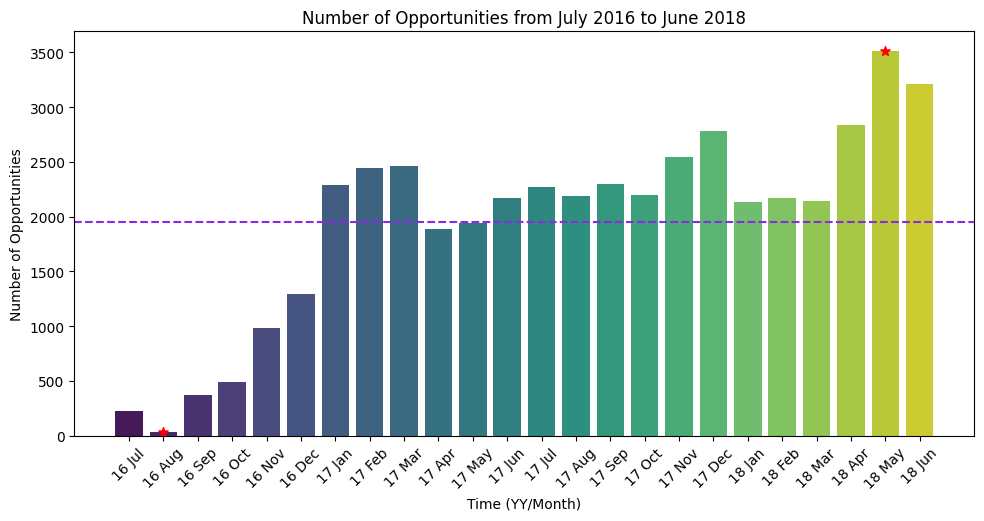

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Month_Yr", y="Opportunities", palette="viridis")
plt.axhline(y=df['Opportunities'].mean(), c="blueviolet", linestyle="--")
plt.xlabel('Time (YY/Month)')
plt.ylabel('Number of Opportunities')
plt.title('Number of Opportunities from July 2016 to June 2018')
plt.tight_layout()
plt.xticks(rotation=45, fontsize=10)
max_opportunities_index = df['Opportunities'].idxmax()
min_opportunities_index = df['Opportunities'].idxmin()
plt.scatter(max_opportunities_index, df['Opportunities'].iloc[max_opportunities_index],
            marker='*', s=50, c='red')
plt.scatter(min_opportunities_index, df['Opportunities'].iloc[min_opportunities_index],
            marker='*', s=50, c='red')
plt.show()

The bar graph illustrates that August 2016 recorded the lowest number of opportunities, implying fewer chances for defects within the product. This could suggest a simpler product configuration or potentially reduced production during that period. Over time, the opportunities noticeably increase, reaching its highest peak in June 2018. This upward trend might signify amplified production, a progression toward more intricate or diversified product lines, or ongoing implementations of new features or processes.

## Defect Rate (PPM conversion)

- Defect Rate: This ratio helps in quantifying the proportion or rate of defects relative to the number of chances where those defects could occur. It is used to measure the performance of a process or product.
- PPM: "parts per million", a way to express the proportion of defective parts relative to a million parts.

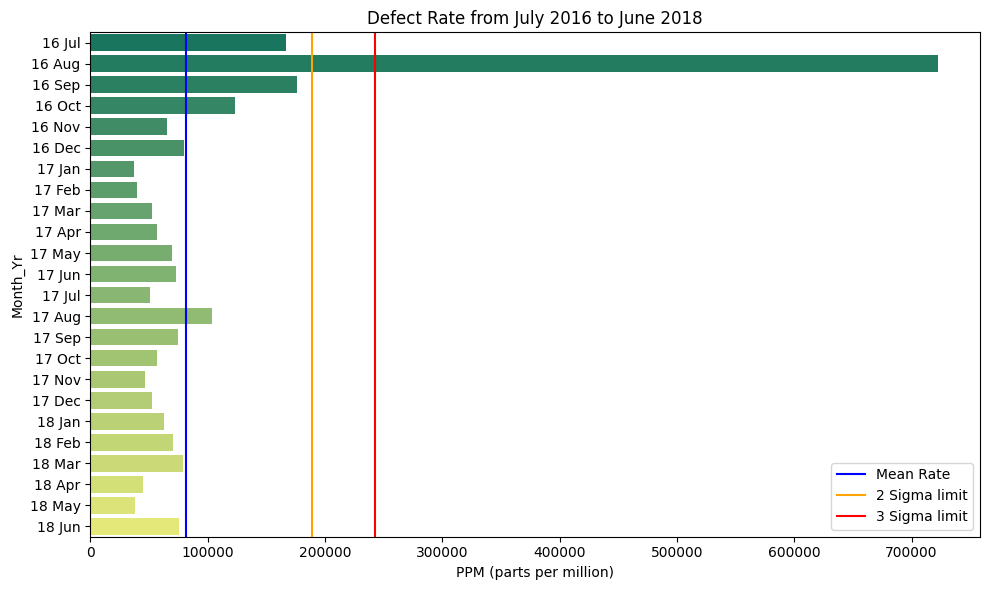

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, y="Month_Yr", x="PPM_conv", palette="summer")
plt.xlabel("PPM (parts per million)")

plt.axvline(x=df['Mean Rate'][0], c="blue", linestyle="-")
plt.axvline(x=df['2 Sigma limit'][0], c="orange", linestyle="-")
plt.axvline(x=df['3 Sigma limit'][0], c="red", linestyle="-")
blue_line = plt.Line2D([0], [0], color='blue', linestyle='-', label='Mean Rate')
orange_line = plt.Line2D([0], [0], color='orange', linestyle='-', label='2 Sigma limit')
red_line = plt.Line2D([0], [0], color='red', linestyle='-', label='3 Sigma limit')

plt.title("Defect Rate from July 2016 to June 2018")
plt.tight_layout()
plt.legend(handles=[blue_line, orange_line, red_line])
plt.show()

The depicted graph illustrates that a majority of the defect rates fell below the mean rate, which indicates a generally favorable trend. However, notable instances in July, September, October 2016, and August 2017 exceeded the 2 sigma limit, signifying a deviation of 2 standard deviations from the mean rate. These outliers warrant a closer examination of the products manufactured during these months to pinpoint the underlying causes of the observed defects.

Particularly striking is the significantly elevated defect rate observed in August 2016, surpassing the 3 sigma limit, suggesting a substantial issue in the production of laptops during that period. Investigating the circumstances surrounding this exceptionally high defect rate becomes imperative to uncover the root causes and address any critical issues affecting the production process.

## Final Visualization

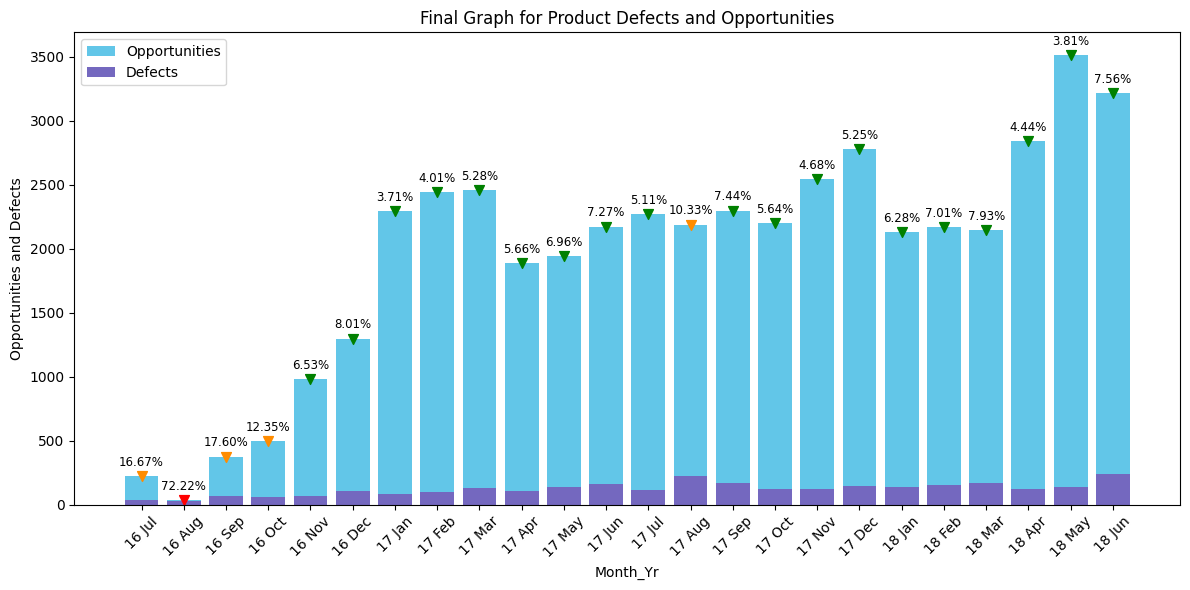

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Month_Yr", y="Opportunities", color='deepskyblue', alpha=0.7, label='Opportunities')
sns.barplot(data=df, x="Month_Yr", y="Defects", color='slateblue', label='Defects')

plt.ylabel("Opportunities and Defects")
plt.title("Final Graph for Product Defects and Opportunities")
plt.xticks(rotation=45, fontsize=10)


for i, rate in enumerate(df['Defect_Rate']): # iterates through each value in the Defect Rate column, i=index, rate=valiue
    plt.text(i, df['Opportunities'][i] + 80, f"{rate:.2%}", ha='center', color='black', fontsize=8.5)
    #plt.text: used to place text on the plot
    #i: x-coordinate where text will be placed
    #df['Opportunities'][i] + 10: iterates the value in 'Opportunities' column and adding 10 positions the text slightly higher above the bar
    #f"{rate:.2%}": formats the rate to percentage
    #ha='center': aligns the text horizontally at its x-coordinate

mean_rate_index = df[df["PPM_conv"]<=df["Mean Rate"]].index
sigma_2_index = df[(df["PPM_conv"]>df["Mean Rate"])&(df["PPM_conv"]<=df["2 Sigma limit"])].index
sigma_3_index = df[df["PPM_conv"]>=df["3 Sigma limit"]].index

plt.scatter(mean_rate_index, df['Opportunities'].iloc[mean_rate_index], marker='v', s=50, c='green')
plt.scatter(sigma_2_index, df['Opportunities'].iloc[sigma_2_index], marker='v', s=50, c='darkorange')
plt.scatter(sigma_3_index, df['Opportunities'].iloc[sigma_3_index], marker='v', s=50, c='red')

plt.legend()

plt.tight_layout()
plt.show()

In our final plot, the majority of the product defect rates align under the mean rate, suggesting a generally stable production phase for the laptops. However, an initial period of four months displayed fluctuations, indicating a phase of instability during the early stages of production. Notably, August 2016 recorded a defect rate exceeding 70%, signifying a critical issue affecting product stability.

As production progressed, the defect rate trended towards normalization. However, in August 2017, the defect rate surpassed the mean rate, warranting a deeper investigation into the production specifics during this period. Understanding the reasons behind this surge, breaching the 2 sigma limit, holds significance in identifying and addressing potential production challenges.

# Conclusion

- The average defects rate for the product stands at approximately 8.13%.
- The 2 sigma limit for defects rate is observed at roughly 18.86%.
- The 3 sigma limit for defects rate is identified at around 24.25%.
- It took a span of 4 months to stabilize the defects rate below the mean rate.
- August 2016 marked the most severe spike in defects rate, reaching an alarming 72.22%.
- Investigating the sudden surge in defects rate during August 2017, following the normalization period, holds significant relevance.
- Notably, January 2017 recorded the lowest defects rate, standing at a mere 3.71%.